In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pylab as plt
# https://docs.scipy.org/doc/numpy/reference/routines.math.html
import numpy as np

colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
from distutils.version import StrictVersion

In [6]:
import sklearn

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.2'

In [7]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

tf.__version__

'1.2.1'

In [8]:
import keras

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

keras.__version__

Using TensorFlow backend.


'2.0.4'

In [9]:
import pandas as pd

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

pd.__version__

'0.20.3'

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [12]:
plt.savefig?

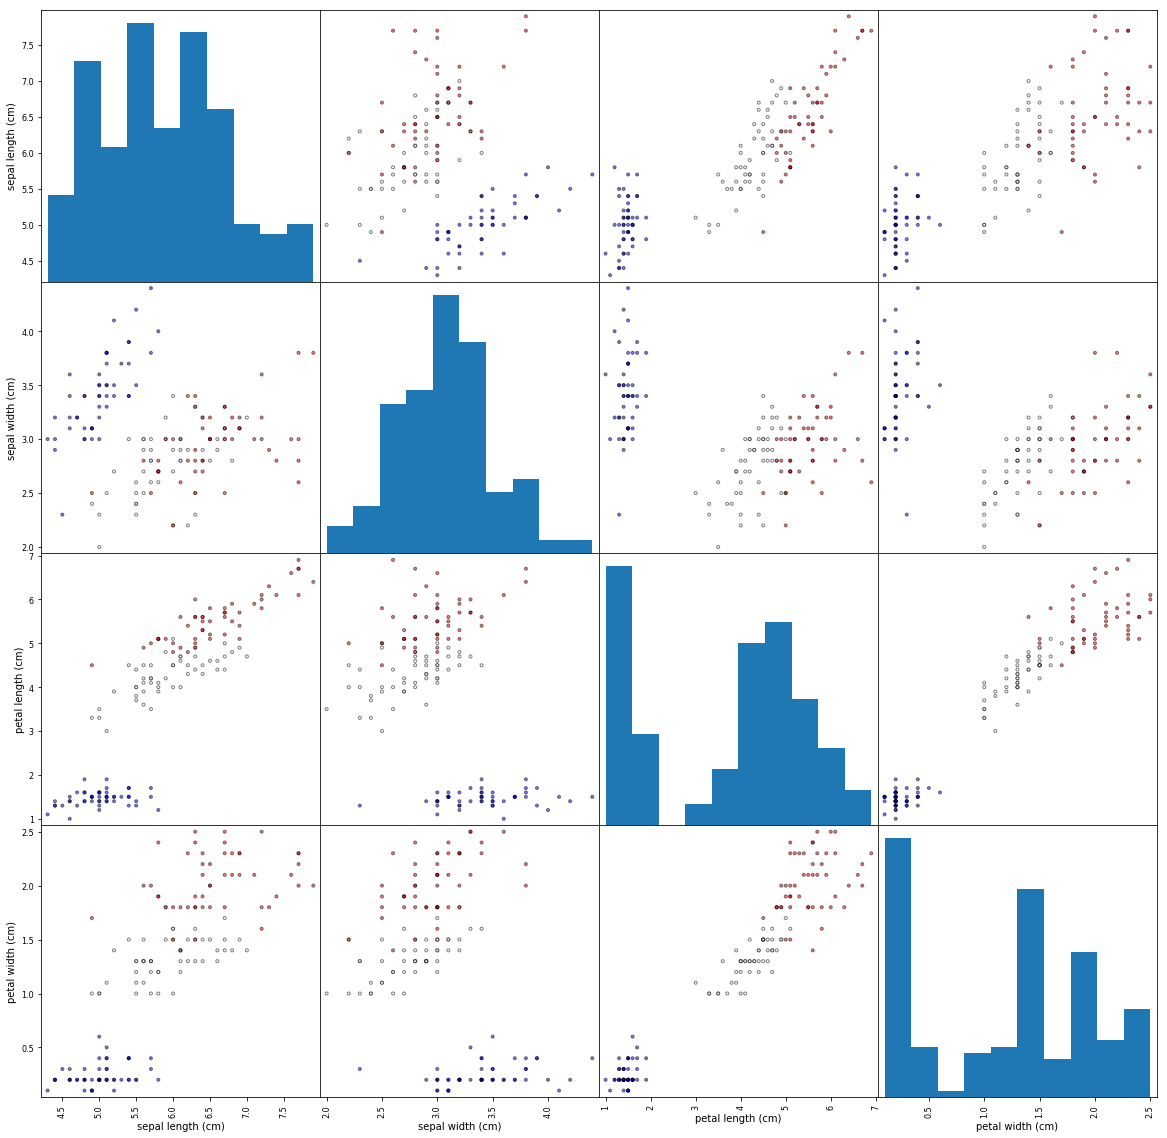

In [13]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(20, 20), cmap=CMAP, edgecolor='black')
plt.savefig('ML_0701.png', bbox_inches='tight')

## Zuerst testen wir unser Modell, ob wir es überhaupt trainiert bekommen, indem wir auf einer kleinen Menge von Daten overfitten

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [16]:
import numpy as np

y = np.array(iris.target)
X = np.array(iris.data)
y.shape, X.shape

((150,), (150, 4))

In [17]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [18]:
# http://cs231n.github.io/neural-networks-3/#sanitycheck
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42, stratify=y)

In [19]:
X_train.shape, y_train.shape

((15, 4), (15, 3))

In [20]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input

In [21]:
# Input?

In [22]:
inputs = Input(shape=(4, ))

In [23]:
Dense?

In [24]:
# just three neurons and linear actions, would that be good enough?
fc = Dense(3)(inputs)

In [25]:
predictions = Dense(3, activation='softmax')(fc)

In [26]:
model = Model(input=inputs, output=predictions)

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit?

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=20, validation_split=0.2)
# model.fit(X, y, epochs=50, batch_size=5, validation_split=0.3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
# 3 neurons just might not be enough, we never seem to achieve 100% accuracy
# so we increase the number of neurons until we get close to 100%
# also add a little of non linearity and some dropout to avoid overfitting

inputs = Input(shape=(4, ))
# fc = Dense(3)(inputs)
fc = Dense(20, activation='sigmoid')(inputs)
# Dropout does not work on Google ML Service using Tensorflow
# because dropout only applies in learning phase
# https://github.com/fchollet/keras/issues/3823
# fc = Dropout(0.25)(fc)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
    %time model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_split=0.3)

### Completely avoided overfitting, but train accuracy not perfect

In [ ]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

In [31]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

15/15 [==============================] - 0s


(2.7540678977966309, 0.0)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

In [ ]:
!mkdir models

In [ ]:
model.save('models/nn-iris.hdf5')

In [ ]:
!ls -l models

## Export as raw tf model

* https://tensorflow.github.io/serving/serving_basic.html
* https://github.com/tensorflow/serving/blob/master/tensorflow_serving/example/mnist_saved_model.py

In [ ]:
import os
from keras import backend as K

In [ ]:
K.set_learning_phase(0)

In [ ]:
sess = K.get_session()

In [ ]:
!rm -r models/tf

In [ ]:
tf.app.flags.DEFINE_integer('model_version', 1, 'version number of the model.')
tf.app.flags.DEFINE_string('work_dir', '/tmp', 'Working directory.')
FLAGS = tf.app.flags.FLAGS

In [ ]:
export_path_base = 'models/tf'
export_path = os.path.join(
  tf.compat.as_bytes(export_path_base),
  tf.compat.as_bytes(str(FLAGS.model_version)))

In [ ]:
classification_inputs = tf.saved_model.utils.build_tensor_info(model.input)
classification_outputs_scores = tf.saved_model.utils.build_tensor_info(model.output)

In [ ]:
from tensorflow.python.saved_model.signature_def_utils_impl import build_signature_def, predict_signature_def

In [ ]:
signature = predict_signature_def(inputs={'inputs': model.input},
                                  outputs={'scores': model.output})

In [ ]:
builder = tf.saved_model.builder.SavedModelBuilder(export_path)

In [ ]:
# builder.add_meta_graph_and_variables(sess=sess,
#                                          tags=[tf.saved_model.tag_constants.SERVING],
#                                          signature_def_map={tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature})

In [ ]:
builder.add_meta_graph_and_variables(
      sess, 
     tags=[tf.saved_model.tag_constants.SERVING],
      signature_def_map={
          tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature
      })

In [ ]:
builder.save()

In [ ]:
# gsutil cp -R 1 gs://irisnn
# create model and version at https://console.cloud.google.com/mlengine
# gcloud ml-engine predict --model=irisnn --json-instances=../../sample_iris.json
# SCORES
# [0.9954029321670532, 0.004596732556819916, 3.3544753819114703e-07]